In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

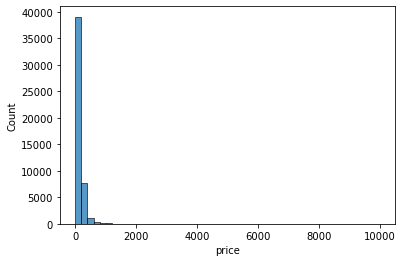

In [4]:
sns.histplot(df["price"], bins=50);

In [5]:
features = ['latitude',
            'longitude',
            'price',
            'minimum_nights',
            'number_of_reviews',
            'reviews_per_month',
            'calculated_host_listings_count',
            'availability_365']

In [6]:
df = df[features]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [7]:
# Question 1

df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

reviews_per_month has 10052 missing values

In [8]:
# Question 2

df["minimum_nights"].median()

3.0

In [9]:
# Split the data

indices = np.array(df.index)

np.random.seed(42)
np.random.shuffle(indices)
indices

array([  879, 44383, 15394, ..., 38158,   860, 15795], dtype=int64)

In [10]:
len(df)*0.6

29337.0

In [11]:
len(df)*0.8

39116.0

In [12]:
df_train = df.iloc[indices[0:int(len(df)*0.6)]]
df_val = df.iloc[indices[int(len(df)*0.6):int(len(df)*0.8)]]
df_test = df.iloc[indices[int(len(df)*0.8):]]

In [13]:
y_train = np.log1p(df_train["price"])
y_val = np.log1p(df_val["price"])
y_test = np.log1p(df_test["price"])

del df_train["price"]
del df_val["price"]
del df_test["price"]

In [18]:
# Question 3

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [35]:
def prepare_X(df, na_value):
    df = df.copy()
    df["reviews_per_month"] = df["reviews_per_month"].fillna(na_value)
    return df

In [36]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.64

In [37]:
X_train = prepare_X(df_train, df_train["reviews_per_month"].mean())
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, df_train["reviews_per_month"].mean())
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.64

In [40]:
# Question 4

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) + r * np.eye(X.shape[1])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [42]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_values:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    print(r, rmse(y_val, y_pred))

0 0.6430337788467193
1e-06 0.6430341157446238
0.0001 0.6430723153546262
0.001 0.6437669735278212
0.01 0.6557528427418694
0.1 0.67732996424535
1 0.682311695016146
5 0.6827915727847539
10 0.6828430212100526


We get the best RMSE with r=0 --> we didn't really need regularization, it seems

In [47]:
# Question 5

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmses = []
for seed in seeds:
    indices = np.array(df.index)

    np.random.seed(seed)
    np.random.shuffle(indices)

    df_train = df.iloc[indices[0:int(len(df)*0.6)]]
    df_val = df.iloc[indices[int(len(df)*0.6):int(len(df)*0.8)]]
    df_test = df.iloc[indices[int(len(df)*0.8):]]

    y_train = np.log1p(df_train["price"])
    y_val = np.log1p(df_val["price"])
    y_test = np.log1p(df_test["price"])

    del df_train["price"]
    del df_val["price"]
    del df_test["price"]

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    rmses.append(rmse(y_val, y_pred))
    
rmses

[0.6549779961545402,
 0.6462523685884172,
 0.6476558177554858,
 0.6375145069192687,
 0.6445809082722467,
 0.630580999658293,
 0.6297851917613978,
 0.6506184266611098,
 0.6489780353489043,
 0.6437565168224396]

In [48]:
round(np.std(rmses), 3)

0.008

In [57]:
# Question 6

indices = np.array(df.index)

np.random.seed(9)
np.random.shuffle(indices)

df_train_full = df.iloc[indices[0:int(len(df)*0.8)]]
df_test = df.iloc[indices[int(len(df)*0.8):]]

y_train_full = np.log1p(df_train_full["price"])
y_test = np.log1p(df_test["price"])

del df_train_full["price"]
del df_test["price"]

X_train_full = prepare_X(df_train_full, 0)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, 0.001)


X_test = prepare_X(df_test, 0)

y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)


0.6452771348581781